# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Bagging & Boosting Methods Capstone Project (Titanic Prediction)</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

![image.png](attachment:image.png)

Makine öğrenmesi dünyasının meşhur problemi (bir proje) olan Titanic data seti ile tanışmaya hoş geldiniz arkadaşlar. Bu projemiz bir Kaggle Projesi olup sıklıkla kullanılan bir gerçek dünya data setidir. Data seti ile ilgili açıklamaya alttaki linkten ulaşabilirsiniz.

https://www.kaggle.com/c/titanic/overview

Bu problemde amacımız https://www.kaggle.com/c/titanic/overview linkindeki görevi yerine getirmek.

**Önemli Not:** Kaggle yarışmalarında bazen data,
* train data
* test data
olarak ayrı verilir.

Buradaki test data bizim model oluştururken kullanacağımız test data değildir.

Bu test data Kaggle'in yarışma sonuçları test etmek için kullandığı datadır.

Dolayısı ile bu test data içinde target variable yani gerçek label değeri (grand truth) bulunmaz.

Bu sebeple kendi model doğruluğumuzu ölçerken bu test datayı kullanamayacağınızdan mevcut train data ile train_test_split yaparak kendi test datanızı oluşturmayı unutmayın!

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

## ---------------------------- Titanic - Machine Learning from Disaster-----------------------------

### Dataset İnfo

* PassengerId: Her yolcu için benzersiz bir tanımlayıcı.
* Survived: Hayatta kalma durumu (0 = Hayır, 1 = Evet).
* Pclass: Bilet sınıfı (1 = 1. sınıf, 2 = 2. sınıf, 3 = 3. sınıf) sosyo-ekonomik durumu temsil ediyor.
* Name: Yolcunun adı.
* Sex: Yolcunun cinsiyeti (erkek veya kadın).
* Age: Yolcunun yaşı. Bazı girişlerde eksik değerler (NaN) var.
* SibSp: Yolcunun Titanic'te bulunan kardeş veya eş sayısı.
* Parch: Yolcunun Titanic'te bulunan ebeveyn veya çocuk sayısı.
* Ticket: Bilet numarası.
* Fare: Bilete ödenen para miktarı.
* Cabin: Kabin numarası. Bu alan birçok eksik değer (NaN) içeriyor.
* Embarked: Biniş yapılan liman (C = Cherbourg, Q = Queenstown, S = Southampton).

# Import the Libarys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import explained_variance_score

import warnings
warnings.filterwarnings("ignore")


# Import the Dataset

In [8]:
df = pd.read_csv(r"C:\Users\Hp\Desktop\Github_Data_Science\Machine_Learning_Project\ML Project 6\gender_submission.csv")

In [9]:
train = pd.read_csv(r"C:\Users\Hp\Desktop\Github_Data_Science\Machine_Learning_Project\ML Project 6\train.csv")

In [10]:
train2 = train.copy()

In [11]:
test = pd.read_csv(r"C:\Users\Hp\Desktop\Github_Data_Science\Machine_Learning_Project\ML Project 6\train.csv")

In [12]:
test2 = test.copy()

In [13]:
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Visualization

In [19]:
train.Survived.value_counts(dropna = False)

0    549
1    342
Name: Survived, dtype: int64

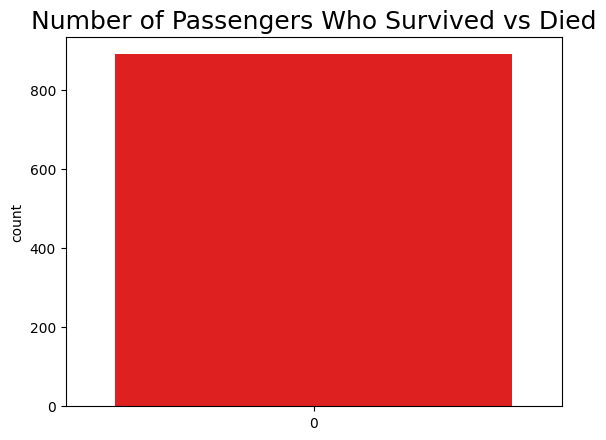

In [20]:
palette = ["red", "blue"]
sb.countplot(train.Survived, palette = palette)
plt.title("Number of Passengers Who Survived vs Died", fontdict = {"fontsize" : 18});

## Pclass Feature

In [21]:
train.Pclass.value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

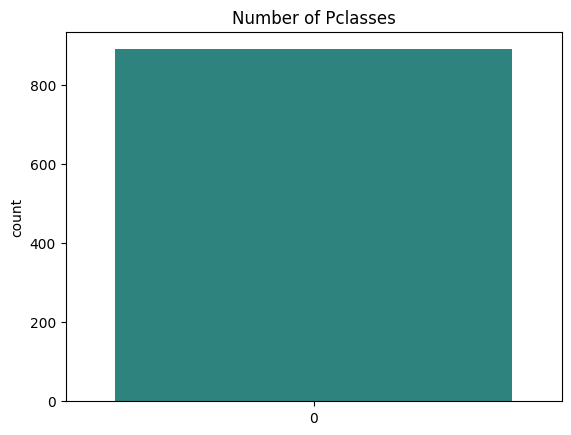

In [22]:
sb.countplot(train.Pclass, palette = "viridis")
plt.title("Number of Pclasses")
plt.show()

## Sex Feature

In [24]:
train.Sex.value_counts(dropna = False)

male      577
female    314
Name: Sex, dtype: int64

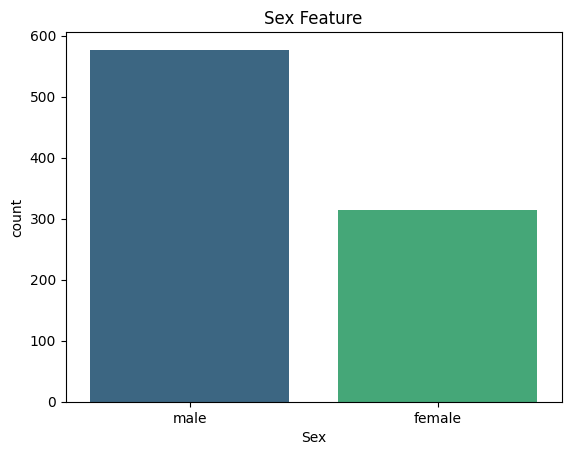

In [27]:
# 'train' isimli DataFrame'in 'Sex' sütunu kategorik veri içeriyor.
sb.countplot(data=train, x='Sex', palette="viridis")
plt.title("Sex Feature")
plt.show()

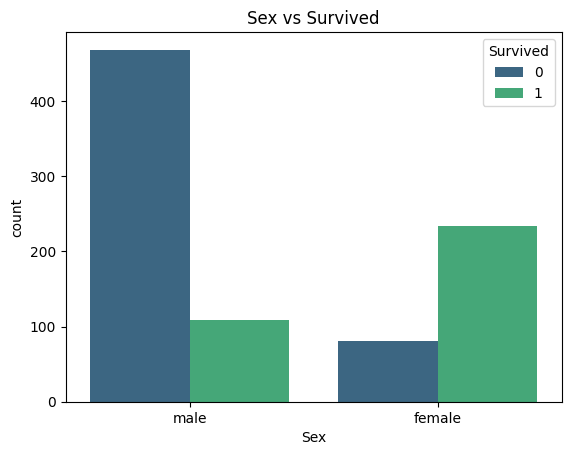

In [28]:
# 'train' DataFrame'inin 'Sex' sütunu için bir countplot çizin,
# ve 'Survived' sütunuyla hue (renk tonu) parametresini kullanın.
sb.countplot(data=train, x='Sex', hue='Survived', palette="viridis")
plt.title("Sex vs Survived")
plt.show()

## Age Feature

In [29]:
train.Age.value_counts(dropna = False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 89, dtype: int64

In [30]:
age = train.Age.value_counts().iloc[:10]

In [31]:
age

24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
30.0    25
21.0    24
25.0    23
36.0    22
29.0    20
Name: Age, dtype: int64

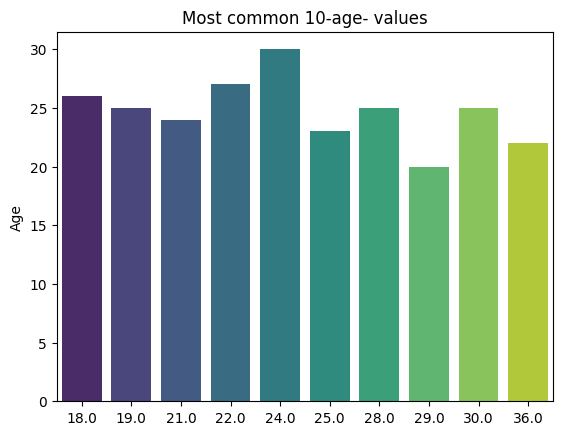

In [32]:
sb.barplot(x = age.index, y= age, palette= "viridis")
plt.title("Most common 10-age- values")
plt.show()

## SibSp Feature

In [33]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

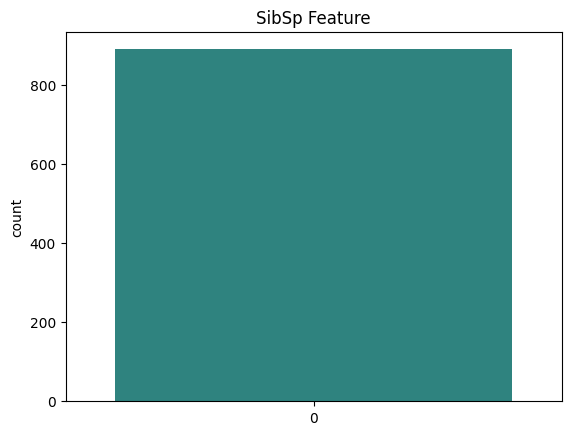

In [34]:
sb.countplot(train.SibSp, palette = "viridis")
plt.title("SibSp Feature")
plt.show()

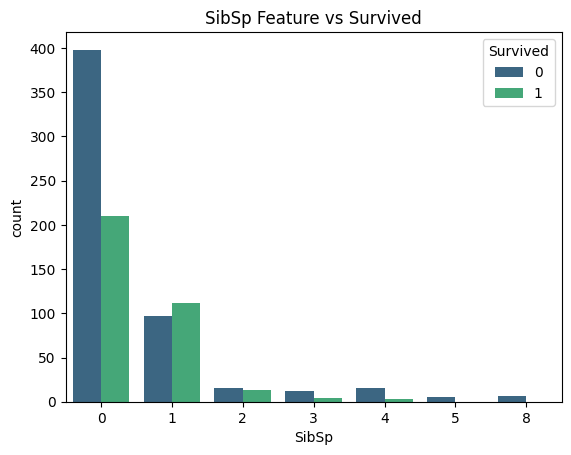

In [36]:
# 'train' DataFrame'inin 'SibSp' sütunu için bir countplot çizin,
# ve 'Survived' sütunuyla hue (renk tonu) parametresini kullanın.
sb.countplot(data=train, x='SibSp', hue='Survived', palette="viridis")
plt.title("SibSp Feature vs Survived")
plt.show()

## Parch Feaure

In [37]:
train.Parch.value_counts(dropna = False )

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

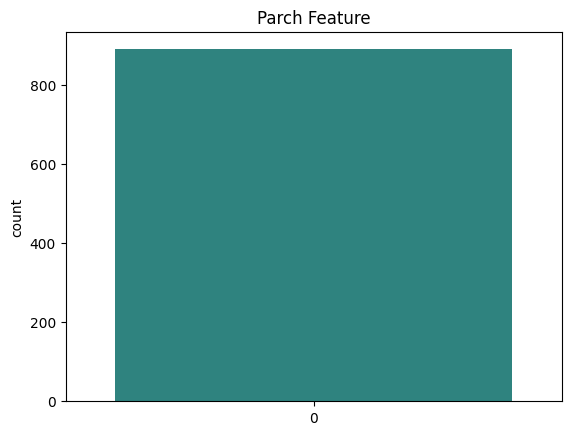

In [38]:
sb.countplot(train.Parch, palette = "viridis")
plt.title("Parch Feature")
plt.show()

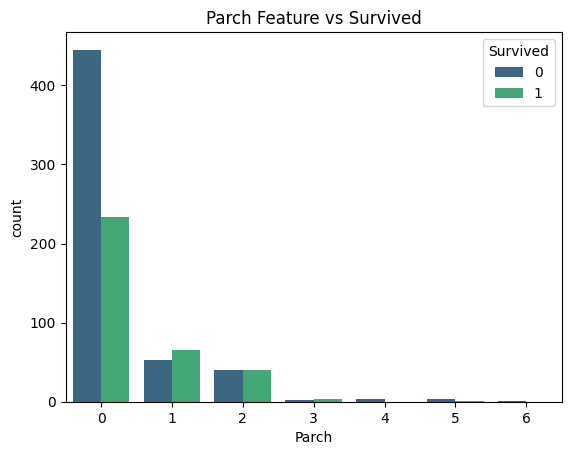

In [40]:
# 'train' DataFrame'inin 'Parch' sütunu için bir countplot çizin,
# ve 'Survived' sütunuyla hue (renk tonu) parametresini kullanın.
sb.countplot(data=train, x='Parch', hue='Survived', palette="viridis")
plt.title("Parch Feature vs Survived")
plt.show()

## Ticket Feaure

In [41]:
train.Ticket.value_counts(dropna = False)

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [42]:
train[train.Ticket == "347082"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


In [43]:
train[train.Ticket == "CA. 2343"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [44]:
train[train.Ticket == "1601"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S


## Fare Faeture

In [45]:
train.Fare.value_counts(dropna = False)

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

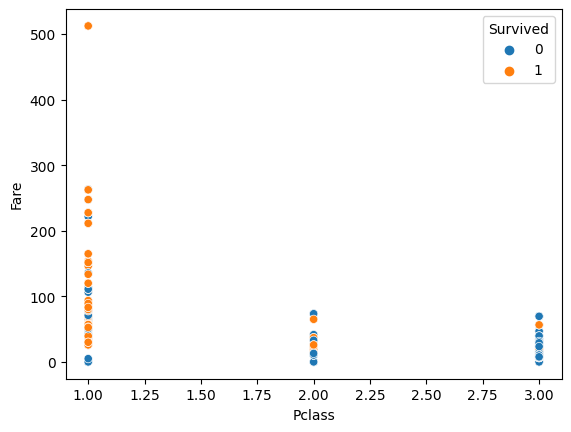

In [46]:
sb.scatterplot(x = train.Pclass, y = train.Fare, hue = train.Survived )

## Embarked Feature

In [47]:
train.Embarked.value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

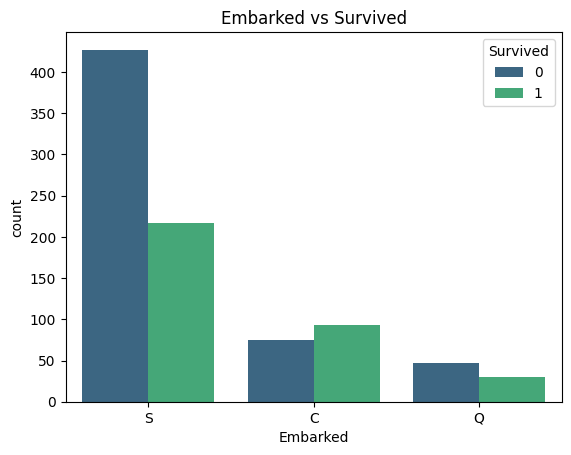

In [49]:
# 'train' DataFrame'inin 'Embarked' sütunu için bir countplot çizin,
# ve 'Survived' sütunuyla hue (renk tonu) parametresini kullanın.
sb.countplot(data=train, x='Embarked', hue='Survived', palette="viridis")
plt.title("Embarked vs Survived")
plt.show()

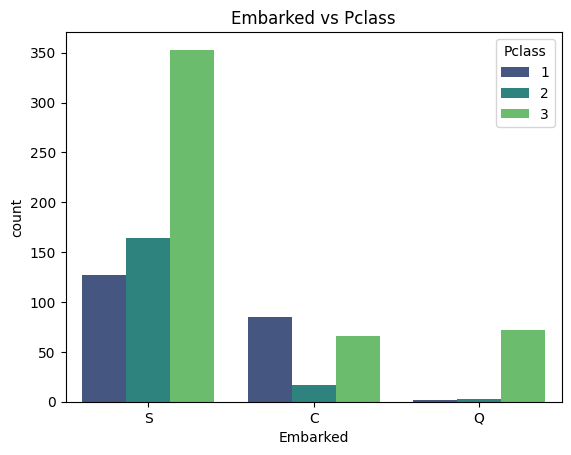

In [52]:
# 'train' DataFrame'inin 'Embarked' sütunu için bir countplot çizin,
# ve 'Pclass' sütunuyla hue (renk tonu) parametresini kullanın.
sb.countplot(data=train, x='Embarked', hue='Pclass', palette="viridis")
plt.title("Embarked vs Pclass")
plt.show()

# Feature Enginering

In [53]:
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
pd.crosstab(train.Cabin, train.Survived).T

Cabin,A10,A14,A16,A19,A20,A23,A24,A26,A31,A32,...,E8,F E69,F G63,F G73,F2,F33,F38,F4,G6,T
Survived,,,,,,,,,,,,,,,,,,,,,
0,1,1,0,1,0,0,1,0,0,1,...,0,0,1,2,1,0,1,0,2,1
1,0,0,1,0,1,1,0,1,1,0,...,2,1,0,0,2,3,0,2,2,0


In [56]:
train.Cabin.value_counts( dropna = False)

NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [57]:
train.Age.value_counts(dropna = False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 89, dtype: int64

In [58]:
train.Age.groupby([train.Pclass]).median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [59]:
for i in range(len(train.Age)):
    if (train.Pclass[i] == 1) and (pd.isna(train.Age[i])):
        train.Age[i] = 37
    elif (train.Pclass[i] == 2) and (pd.isna(train.Age[i])): 
        train.Age[i] = 29
    elif (train.Pclass[i] == 3) and (pd.isna(train.Age[i])):    
        train.Age[i] = 24
        
train.Age.value_counts(dropna = False)      

24.00    166
37.00     36
29.00     31
22.00     27
18.00     26
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 88, dtype: int64

In [60]:
for i in range(len(test.Age)):
    if (test.Pclass[i] == 1) and (pd.isna(test.Age[i])):
        test.Age[i] = 37
    elif (test.Pclass[i] == 2) and (pd.isna(test.Age[i])): 
        test.Age[i] = 29
    elif (test.Pclass[i] == 3) and (pd.isna(test.Age[i])):    
        test.Age[i] = 24
        
test.Age.value_counts(dropna = False)

24.0    89
21.0    17
22.0    16
29.0    15
30.0    15
        ..
67.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: Age, Length: 79, dtype: int64

In [62]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
train.Embarked.groupby(train.Pclass).value_counts(dropna = False)

Pclass  Embarked
1       S           127
        C            85
        NaN           2
        Q             2
2       S           164
        C            17
        Q             3
3       S           353
        Q            72
        C            66
Name: Embarked, dtype: int64

In [64]:
train[pd.isna(train.Embarked)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [65]:
train.Embarked.fillna("S", inplace = True)

In [66]:
train.Embarked.value_counts(dropna = False)

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [67]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [68]:
test[pd.isna(test.Fare)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [69]:
test.Fare.fillna(test.Fare[test.Pclass == 3].median(), inplace = True)

In [70]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

# Dependent and Independent Variables

In [71]:
len_train = len(train)
len_train

891

In [72]:
len_test = len(test)
len_test

418

In [73]:
train = pd.concat([train, test], axis = 0)

In [74]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
le=LabelEncoder()
train["Sex"]=le.fit_transform(train["Sex"])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [77]:
embarked = train.Embarked.str.get_dummies()
train = pd.concat([train, embarked], axis =1)

In [78]:
train["relative"] = train["SibSp"] + train["Parch"]

In [79]:
test = train[891:]

In [80]:
train = train[:891]

In [81]:
test.shape

(418, 16)

In [82]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     0 non-null      float64
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    int32  
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
 12  C            418 non-null    int64  
 13  Q            418 non-null    int64  
 14  S            418 non-null    int64  
 15  relative     418 non-null    int64  
dtypes: float64(3), int32(1), int64(8), object(4)
memory usage: 53.9+ KB


In [83]:
train.shape

(891, 16)

In [84]:
y_test = df.Survived
X_test = test.drop(columns = ["PassengerId", "Name", "Cabin", "Ticket", "Survived", "Embarked", "SibSp", "Parch"])
y_train = train.Survived
X_train = train.drop(columns = ["PassengerId", "Name", "Cabin", "Ticket", "Survived", "Embarked", "SibSp", "Parch"])

In [85]:
X_train.head()

,Pclass,Sex,Age,Fare,C,Q,S,relative
0,3,1,22.0,7.2500,0,0,1,1
1,1,0,38.0,71.2833,1,0,0,1
2,3,0,26.0,7.9250,0,0,1,0
3,1,0,35.0,53.1000,0,0,1,1
4,3,1,35.0,8.0500,0,0,1,0


In [86]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int32  
 2   Age       891 non-null    float64
 3   Fare      891 non-null    float64
 4   C         891 non-null    int64  
 5   Q         891 non-null    int64  
 6   S         891 non-null    int64  
 7   relative  891 non-null    int64  
dtypes: float64(2), int32(1), int64(5)
memory usage: 59.2 KB


In [87]:
n = 31

# Gradient Boosting Modelling and Model Performance

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

In [89]:
gradient_model = GradientBoostingClassifier(random_state = n)

In [90]:
gradient_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=31)

In [91]:
y_pred = gradient_model.predict(X_test)
y_train_pred = gradient_model.predict(X_train)

In [92]:
print(confusion_matrix(y_test, y_pred))

[[253  13]
 [ 28 124]]


In [93]:
accuracy_score(y_test, y_pred)

0.9019138755980861

In [94]:
print(confusion_matrix(y_train, y_train_pred))

[[524  25]
 [ 62 280]]


In [95]:
accuracy_score(y_train, y_train_pred)

0.9023569023569024

## Grid Search

In [96]:
gradient_model = GradientBoostingClassifier(random_state = n)

In [97]:
param_grid = {"n_estimators": range(1, 51, 5), "max_depth" : [5], "learning_rate" : [ 0.01, 0.1],
            "subsample" : [0.5, 1], "max_features" : [None, 2, 3, 4]}

In [98]:
gradient_grid_model = GridSearchCV(gradient_model, param_grid, scoring= 'accuracy')
gradient_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=31),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [5],
                         'max_features': [None, 2, 3, 4],
                         'n_estimators': range(1, 51, 5),
                         'subsample': [0.5, 1]},
             scoring='accuracy')

In [99]:
gradient_grid_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'max_features': 4,
 'n_estimators': 36,
 'subsample': 1}

In [100]:
y_pred = gradient_grid_model.predict(X_test)
y_train_pred = gradient_grid_model.predict(X_train)

In [101]:
print(confusion_matrix(y_test, y_pred))

[[255  11]
 [ 32 120]]


In [102]:
accuracy_score(y_test, y_pred)

0.8971291866028708

In [103]:
print(confusion_matrix(y_train, y_train_pred))

[[526  23]
 [ 68 274]]


In [104]:
accuracy_score(y_train, y_train_pred)

0.8978675645342312

# XG Boositing 

In [106]:
xg_model = XGBClassifier(random_state = n)
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=31,
              reg_alpha=0, reg_lambda=1, ...)

In [107]:
y_pred = xg_model.predict(X_test)
y_train_pred = xg_model.predict(X_train)

In [109]:
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_train, y_train_pred))

0.8397129186602871
0.9640852974186308


## Grid Search

In [110]:
xg2_model = XGBClassifier(random_state = n)
param_grid = {"n_estimators": range(50, 101), "max_depth" : [3, 5, 6], "learning_rate" : [0.1, 1],
            }
xgb_grid = GridSearchCV(xg2_model, param_grid, scoring= 'accuracy', verbose = 0)
xgb_grid.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                       

In [111]:
xgb_grid.best_params_

{'learning_rate': 1, 'max_depth': 3, 'n_estimators': 50}

In [112]:
y_pred = xgb_grid.predict(X_test)
y_train_pred = xgb_grid.predict(X_train)

In [114]:
print(confusion_matrix(y_test, y_pred))

[[232  34]
 [ 33 119]]


In [115]:
accuracy_score(y_test, y_pred)

0.8397129186602871

In [116]:
print(confusion_matrix(y_train, y_train_pred))

[[526  23]
 [ 37 305]]


In [117]:
accuracy_score(y_train, y_train_pred)

0.9326599326599326

In [118]:
xg_grid_test =  accuracy_score(y_test, y_pred)
xg_grid_f1_test  = f1_score(y_test, y_pred)
xg_grid_acr_train = accuracy_score(y_train, y_train_pred)
xg_grid_f1_train  = f1_score(y_train, y_train_pred)

## Submission

In [120]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':y_pred})
submission.Survived = submission.Survived.astype("int")
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [121]:
filename = 'submission.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submission.csv
